<a href="https://colab.research.google.com/github/Leticia-Lemus/Datos_metereol-gicos/blob/main/Datos_metereol%C3%B3gicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 22.113,
	"longitude": -103.2671,
	"hourly": ["temperature_2m", "precipitation_probability", "relative_humidity_2m"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_precipitation_probability = hourly.Variables(1).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(2).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["precipitation_probability"] = hourly_precipitation_probability
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 22.125°N -103.375°E
Elevation 1666.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
                         date  temperature_2m  precipitation_probability  \
0   2025-04-11 00:00:00+00:00       29.658001                        0.0   
1   2025-04-11 01:00:00+00:00       27.708000                        0.0   
2   2025-04-11 02:00:00+00:00       25.408001                        0.0   
3   2025-04-11 03:00:00+00:00       24.257999                        0.0   
4   2025-04-11 04:00:00+00:00       23.257999                        0.0   
..                        ...             ...                        ...   
163 2025-04-17 19:00:00+00:00       31.808001                        0.0   
164 2025-04-17 20:00:00+00:00       33.158001                        0.0   
165 2025-04-17 21:00:00+00:00       33.858002                        0.0   
166 2025-04-17 22:00:00+00:00       33.557999                        0.0   
167 2025-04-17 23:00:00+00:00       32.608002             

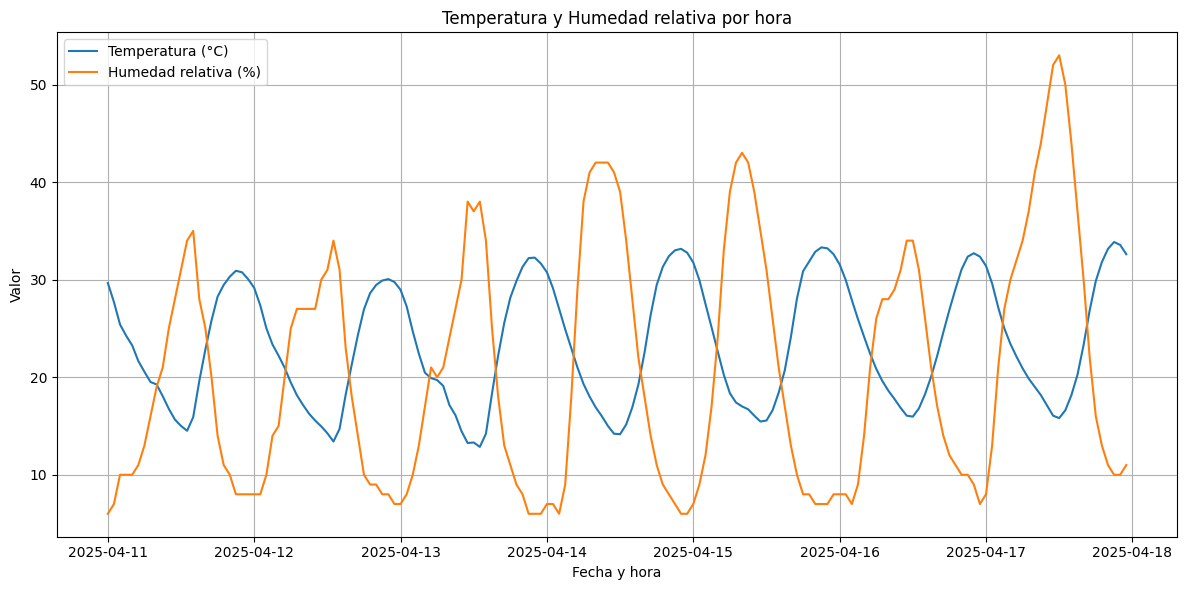

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe["date"], hourly_dataframe["temperature_2m"], label="Temperatura (°C)")
plt.plot(hourly_dataframe["date"], hourly_dataframe["relative_humidity_2m"], label="Humedad relativa (%)")
plt.xlabel("Fecha y hora")
plt.ylabel("Valor")
plt.title("Temperatura y Humedad relativa por hora")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

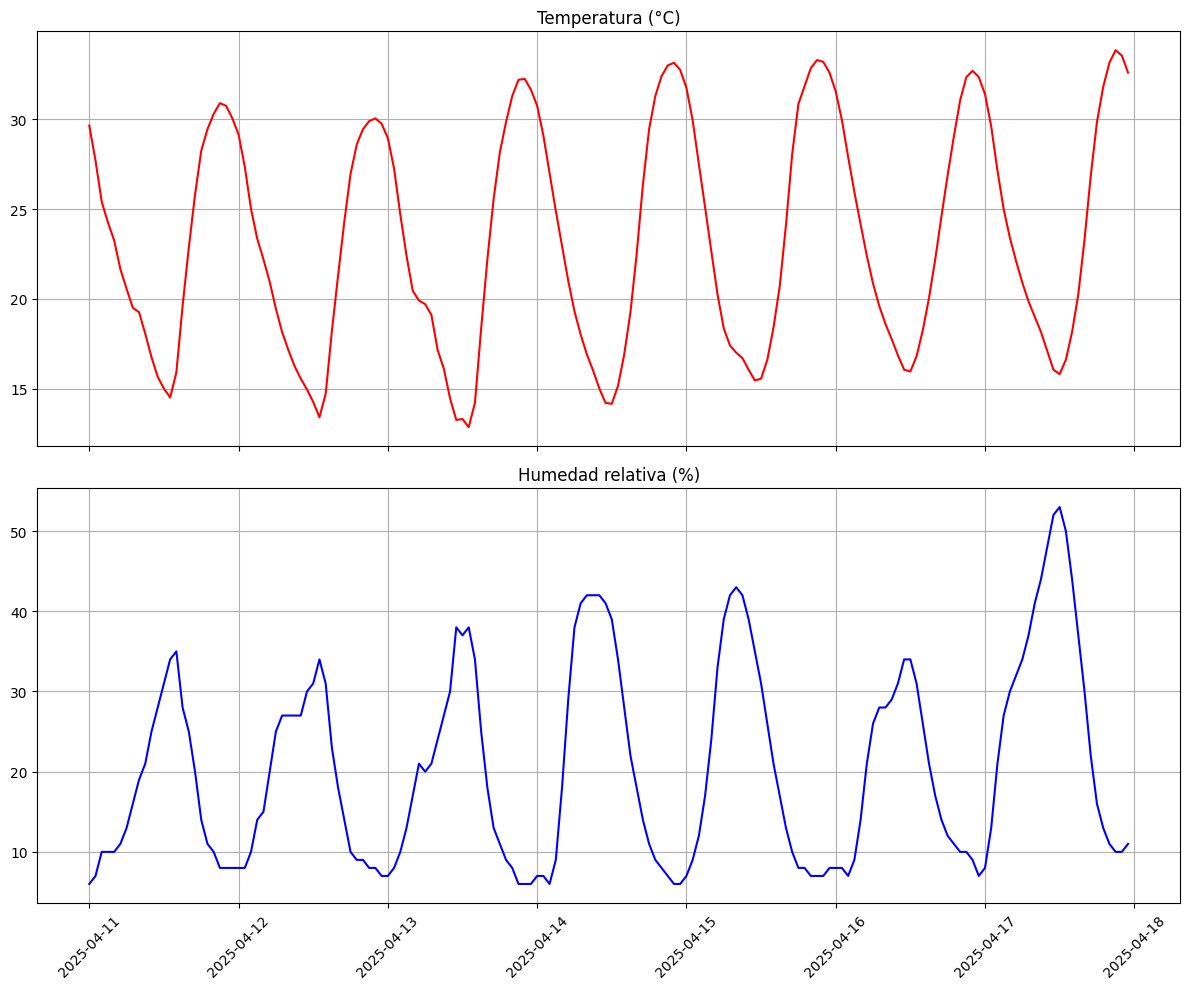

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

axs[0].plot(hourly_dataframe["date"], hourly_dataframe["temperature_2m"], color='red')
axs[0].set_title("Temperatura (°C)")

axs[1].plot(hourly_dataframe["date"], hourly_dataframe["relative_humidity_2m"], color='blue')
axs[1].set_title("Humedad relativa (%)")

#axs[2].bar(hourly_dataframe["date"], hourly_dataframe["precipitation_probability"], color='skyblue')
#axs[2].set_title("Probabilidad de precipitación (%)")

for ax in axs:
    ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


datos con más variables

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 22.113,
	"longitude": -103.2671,
	"daily": ["uv_index_max", "wind_speed_10m_max"],
	"hourly": ["temperature_2m", "precipitation_probability", "relative_humidity_2m"],
	"timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_precipitation_probability = hourly.Variables(1).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(2).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["precipitation_probability"] = hourly_precipitation_probability
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_uv_index_max = daily.Variables(0).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(1).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["uv_index_max"] = daily_uv_index_max
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

Coordinates 22.125°N -103.375°E
Elevation 1666.0 m asl
Timezone b'America/Mexico_City'b'GMT-6'
Timezone difference to GMT+0 -21600 s
                         date  temperature_2m  precipitation_probability  \
0   2025-04-10 06:00:00+00:00       16.858000                        0.0   
1   2025-04-10 07:00:00+00:00       15.858000                        0.0   
2   2025-04-10 08:00:00+00:00       14.608000                        0.0   
3   2025-04-10 09:00:00+00:00       13.908000                        0.0   
4   2025-04-10 10:00:00+00:00       13.508000                        0.0   
..                        ...             ...                        ...   
163 2025-04-17 01:00:00+00:00       29.608000                        0.0   
164 2025-04-17 02:00:00+00:00       27.158001                        0.0   
165 2025-04-17 03:00:00+00:00       25.007999                        0.0   
166 2025-04-17 04:00:00+00:00       23.408001                        0.0   
167 2025-04-17 05:00:00+00:00  

Graficos

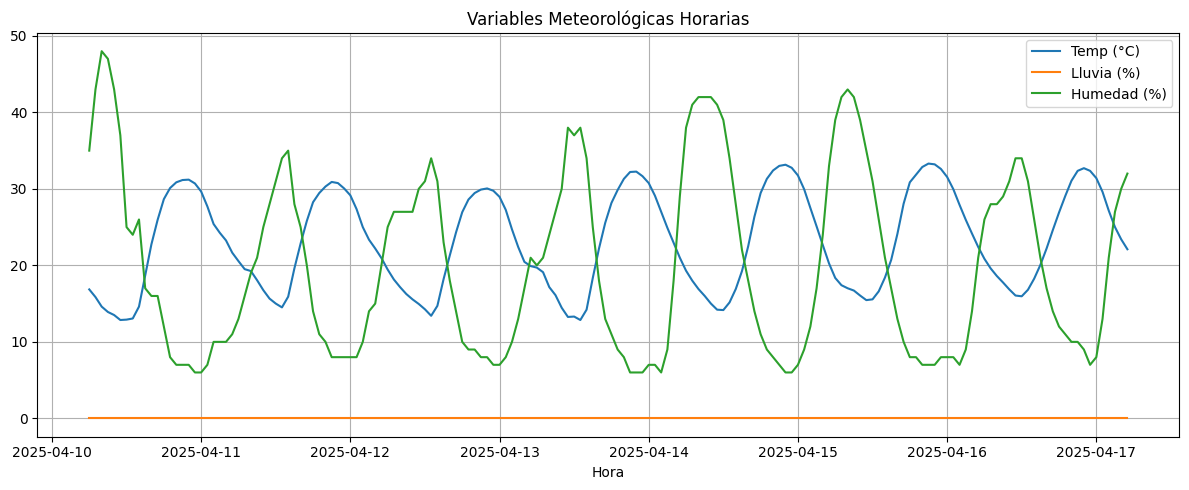

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(hourly_dataframe["date"], hourly_dataframe["temperature_2m"], label="Temp (°C)")
plt.plot(hourly_dataframe["date"], hourly_dataframe["precipitation_probability"], label="Lluvia (%)")
plt.plot(hourly_dataframe["date"], hourly_dataframe["relative_humidity_2m"], label="Humedad (%)")
plt.title("Variables Meteorológicas Horarias")
plt.xlabel("Hora")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

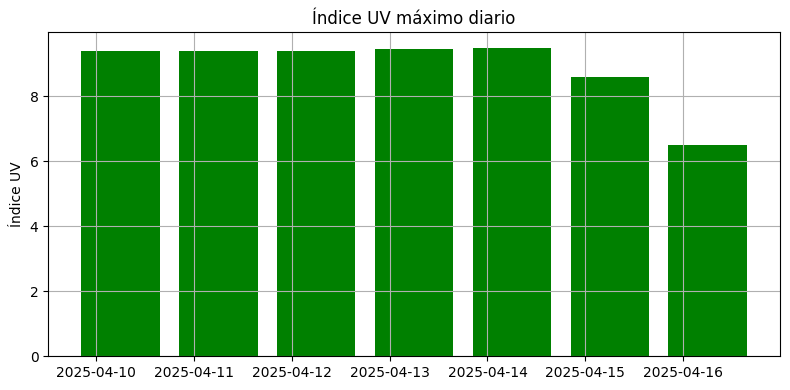

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(daily_dataframe["date"], daily_dataframe["uv_index_max"], color="green")
plt.title("Índice UV máximo diario")
#plt.xlabel("Fecha")
plt.ylabel("Índice UV")
plt.grid(True)
plt.tight_layout()
plt.show()